To start working with NetworkX, we're going to build a graph for a single event. We can do this in a couple of different ways: adding attributes piece-by-piece, building it from list of edges or through a dataframe. Then, we'll play with the measures and do basic plotting.  

The event we'll be working with is:

```
event_id: 233228364
name: Tomato Art Festival
date: 2016-08-13 20:00:00
group: 20s in Nashville
yes_rsvps: 10
```

The member information will come from the `rsvps` data.

In [19]:
import pandas as pd

example = pd.read_csv('data\\example_members.csv', index_col='member_id')

print('The members attending this event are:')
print(', '.join(example.name))

The members attending this event are:
Alexandra, Andrea, Christina, Cory, Jermaine, Kealy, Lifeavinash, Shealyn, Tsion, Zack


### 1. Creating a graph via declarative syntax.

The first way to create a graph is to explicitly add nodes and edges. 

```
g.add_node(node_id)
g.add_edge(node_id, node_id)
```

In [20]:
import networkx as nx

In [23]:
# Instantiate an undirected graph
g = nx.Graph()

# Add member nodes
for member in example.name:
    g.add_node(member)
    
# Add event node
g.add_node('tomato-festival')

# Add edges
for member in example.name:
    g.add_edge(member, 'tomato-festival')

In [24]:
g

You can access a "view" of the nodes and edges view the `g.nodes` and `g.edges` methods. Applying a `dict` to the view or passing `data=True` will expose the attributes of the underlying objects.

In [25]:
g.nodes

NodeView(('Alexandra', 'Andrea', 'Christina', 'Cory', 'Jermaine', 'Kealy', 'Lifeavinash', 'Shealyn', 'Tsion', 'Zack', 'tomato-festival'))

In [26]:
g.nodes(data=True) # Notice each node has an empty attribute dict

NodeDataView({'Alexandra': {}, 'Andrea': {}, 'Christina': {}, 'Cory': {}, 'Jermaine': {}, 'Kealy': {}, 'Lifeavinash': {}, 'Shealyn': {}, 'Tsion': {}, 'Zack': {}, 'tomato-festival': {}})

In [27]:
dict(g.nodes) # Similarly, access by coercing into a dict

{'Alexandra': {},
 'Andrea': {},
 'Christina': {},
 'Cory': {},
 'Jermaine': {},
 'Kealy': {},
 'Lifeavinash': {},
 'Shealyn': {},
 'Tsion': {},
 'Zack': {},
 'tomato-festival': {}}

##### Attributes
You can add attributes in two ways:

1. Assign them directly, like you would a dict.
2. Use the `nx.set_XXXX_attributes` function.

In [29]:
# We can assign attributes in single statements or for loops
g.nodes['tomato-festival']['node_type'] = 'event'

for member in example.name:
    g.nodes[member]['node_type'] = 'person'

# ...but a combination of listcomps and the "set_node/edge_attributes" function is more succinct.
nx.set_edge_attributes(G = g, 
                       values = {e: 'yes_rsvp' for e in g.edges}, 
                       name = 'edge_type')

In [30]:
dict(g.nodes)

{'Alexandra': {'node_type': 'person'},
 'Andrea': {'node_type': 'person'},
 'Christina': {'node_type': 'person'},
 'Cory': {'node_type': 'person'},
 'Jermaine': {'node_type': 'person'},
 'Kealy': {'node_type': 'person'},
 'Lifeavinash': {'node_type': 'person'},
 'Shealyn': {'node_type': 'person'},
 'Tsion': {'node_type': 'person'},
 'Zack': {'node_type': 'person'},
 'tomato-festival': {'node_type': 'event'}}

In [9]:
dict(g.edges)

{('Alexandra', 'tomato-festival'): {'edge_type': 'yes_rsvp'},
 ('Andrea', 'tomato-festival'): {'edge_type': 'yes_rsvp'},
 ('Christina', 'tomato-festival'): {'edge_type': 'yes_rsvp'},
 ('Cory', 'tomato-festival'): {'edge_type': 'yes_rsvp'},
 ('Jermaine', 'tomato-festival'): {'edge_type': 'yes_rsvp'},
 ('Kealy', 'tomato-festival'): {'edge_type': 'yes_rsvp'},
 ('Lifeavinash', 'tomato-festival'): {'edge_type': 'yes_rsvp'},
 ('Shealyn', 'tomato-festival'): {'edge_type': 'yes_rsvp'},
 ('Tsion', 'tomato-festival'): {'edge_type': 'yes_rsvp'},
 ('Zack', 'tomato-festival'): {'edge_type': 'yes_rsvp'}}

##### Building graphs from lists and dataframes

There are many other methods for building graphs which might take advantage of your existing data structures. These include building it from a list of edges (which can be useful when combined with listcomps) or from a pandas dataframe.

In [31]:
# From an edge_list
g = nx.from_edgelist([(n, 'tomato-festival') for n in example.name])

In [32]:
# From a dataframe
example['event_name'] = 'tomato-festival'
example['edge_type'] = 'yes_rsvp'
g = nx.from_pandas_dataframe(example, 
                             source='name', 
                             target='event_name', 
                             edge_attr='edge_type')

# Set node attributes
node_type_dict = dict([(n, 'member') if n in example.name.tolist()
                           else (n, 'event') for n in g.nodes])
nx.set_node_attributes(g, node_type_dict, 'node_type')

... and there are many other methods available.

In [12]:
[m for m in dir(nx) if 'from_' in m]

['from_dict_of_dicts',
 'from_dict_of_lists',
 'from_edgelist',
 'from_nested_tuple',
 'from_numpy_array',
 'from_numpy_matrix',
 'from_pandas_adjacency',
 'from_pandas_dataframe',
 'from_pandas_edgelist',
 'from_prufer_sequence',
 'from_scipy_sparse_matrix']

### 2. Getting graph metrics

There are many built-in functions for calculating graph measures. They typically take the form of `nx.some_measure(g)` and return a dictionary of values.

Degree is one exception -- it is so common and useful that it has its own special view. (It can be coerced into a dictionary, however.)

In [13]:
nx.degree(g)

DegreeView({'Alexandra': 1, 'tomato-festival': 10, 'Andrea': 1, 'Christina': 1, 'Cory': 1, 'Jermaine': 1, 'Kealy': 1, 'Lifeavinash': 1, 'Shealyn': 1, 'Tsion': 1, 'Zack': 1})

In [33]:
dict(nx.degree(g))

{'Alexandra': 1,
 'Andrea': 1,
 'Christina': 1,
 'Cory': 1,
 'Jermaine': 1,
 'Kealy': 1,
 'Lifeavinash': 1,
 'Shealyn': 1,
 'Tsion': 1,
 'Zack': 1,
 'tomato-festival': 10}

In [34]:
nx.betweenness_centrality(g)

{'Alexandra': 0.0,
 'Andrea': 0.0,
 'Christina': 0.0,
 'Cory': 0.0,
 'Jermaine': 0.0,
 'Kealy': 0.0,
 'Lifeavinash': 0.0,
 'Shealyn': 0.0,
 'Tsion': 0.0,
 'Zack': 0.0,
 'tomato-festival': 1.0}

### 3. Drawing simple graphs.

NetworkX includes functionality for plotting graphs quickly and easily using `matplotlib`. There are two fundamental aspects to plotting graphs:

1. Getting a layout dictionary.
    - To plot a graph, each node must have a defined position in the x-y plane. Several functions can provide these for you, including `nx.circular_layout`, `nx.spring_layout` and `nx.random_layout`.
2. Plotting nodes, edges and labels.
    - The plotting call can be done all at once (via `nx.draw_networkx`) or piecemeal through `nx.draw_networkx_nodes`, `nx.draw_networkx_edges`, etc. In each case, you must provide the graph and position dictionary.

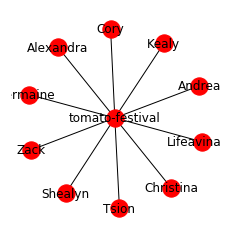

In [16]:
import matplotlib.pyplot as plt
from utils import setup_graph_plot   # Configures useful matplotlib settings

fig, ax = setup_graph_plot()

pos = nx.spring_layout(g)
nx.draw_networkx(g, pos)

plt.show()

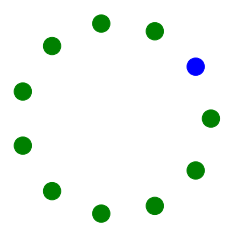

In [17]:
# Plotting nodes and edges separately can be helpful

fig, ax = setup_graph_plot()

colors = ['g' if g.nodes[n]['node_type'] == 'member' else 'b' for n in g.nodes]

pos = nx.circular_layout(g)
nx.draw_networkx_nodes(g, pos, node_color=colors) # No labels are plotted either

plt.show()

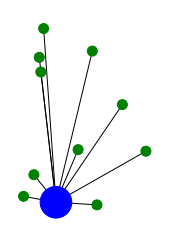

In [18]:
# Plotting nodes and edges separately can be helpful

fig, ax = setup_graph_plot()

colors = ['g' if g.nodes[n]['node_type'] == 'member' else 'b' for n in g.nodes]
sizes = [100*g.degree[n] for n in g.nodes]

pos = nx.random_layout(g)
nx.draw_networkx_nodes(g, pos, node_color=colors, node_size=sizes) 
nx.draw_networkx_edges(g, pos)

plt.show()

Great! We have now seen how to build a simple graph, access measurements from it and make a basic plot. In the next post, we'll see how to do this on the MeetUp data.